# # Activation functions 

Function that activates the particular neuron or node if the value across a particular threshold. These functions add the necessary non-linearity in the ANNs. Each perceptron is, in reality (and traditionally), a logistic regression unit. When N units are stacked on top of each other we get a basic single layer perceptron which serves as the basis of Artificial neural network. 

[Click here for Google's ML glossary definition](https://developers.google.com/machine-learning/glossary#activation-function)

There are different types of activation function and each has its benefits and faults. One of the consideration is the ease in evaluation of the gradient. It should be easy but also help in the final learning process by translating the necessary abstraction and non-linearity across the network. Some of the activation functions are primarily used to model the output of the ANN. Traditionally for a classification task, we would use a sigmoid activation function for a binary classification to predict a binary output (yes/no). In the case of multi-class classification that activation is replaced by softmax activation to estimate the 'probability' across different classes. 

Some of the traditionally used Activation functions: 
<ul>
    <li>Sigmoid activaton function</li>
    <li>tanh (hyperbolic tangent) activaton function</li>
    <li>ReLU activaton function</li>
    <li>Leaky ReLU activaton function</li>
    <li>Softplus function </li>
    <li>Softmax function </li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_palette("deep")

## ## Baseline reference 

In [2]:
z = np.linspace(-10,10,100)

### Sigmoid activation function

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
# derivative of Sigmoid Function
def dsigmoid(a):
    return a*(1-a) # returns a derivative od sigmoid function if a=sigmoid then a'=a(1-a)

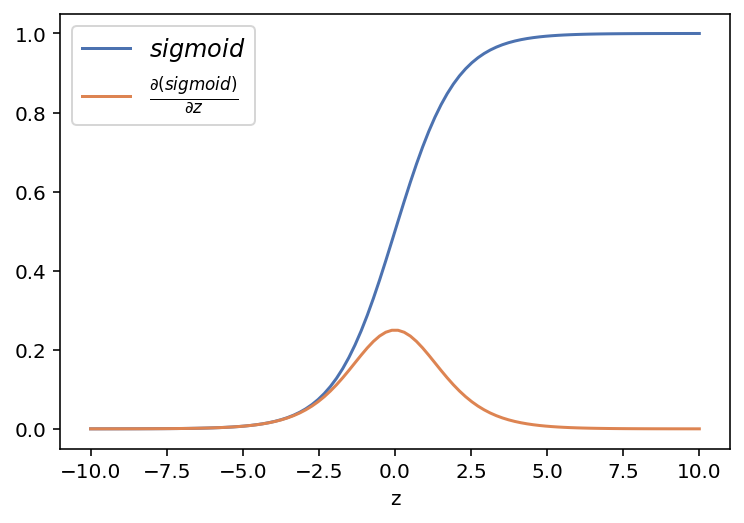

In [15]:
plt.plot(z, sigmoid(z), label = r'$sigmoid$')
plt.plot(z, dsigmoid(sigmoid(z)), label = r'$ \frac{\partial (sigmoid)}{\partial z}$')
plt.legend(fontsize = 12)
plt.xlabel('z')
plt.show()

In [16]:
# Pytorch autograd example
import torch
x = torch.tensor(z, requires_grad=True)
print(x.requires_grad)
b = torch.sigmoid(x)

True


In [17]:
x

tensor([-10.0000,  -9.7980,  -9.5960,  -9.3939,  -9.1919,  -8.9899,  -8.7879,
         -8.5859,  -8.3838,  -8.1818,  -7.9798,  -7.7778,  -7.5758,  -7.3737,
         -7.1717,  -6.9697,  -6.7677,  -6.5657,  -6.3636,  -6.1616,  -5.9596,
         -5.7576,  -5.5556,  -5.3535,  -5.1515,  -4.9495,  -4.7475,  -4.5455,
         -4.3434,  -4.1414,  -3.9394,  -3.7374,  -3.5354,  -3.3333,  -3.1313,
         -2.9293,  -2.7273,  -2.5253,  -2.3232,  -2.1212,  -1.9192,  -1.7172,
         -1.5152,  -1.3131,  -1.1111,  -0.9091,  -0.7071,  -0.5051,  -0.3030,
         -0.1010,   0.1010,   0.3030,   0.5051,   0.7071,   0.9091,   1.1111,
          1.3131,   1.5152,   1.7172,   1.9192,   2.1212,   2.3232,   2.5253,
          2.7273,   2.9293,   3.1313,   3.3333,   3.5354,   3.7374,   3.9394,
          4.1414,   4.3434,   4.5455,   4.7475,   4.9495,   5.1515,   5.3535,
          5.5556,   5.7576,   5.9596,   6.1616,   6.3636,   6.5657,   6.7677,
          6.9697,   7.1717,   7.3737,   7.5758,   7.7778,   7.97

In [18]:
b.backward(torch.ones(x.shape))

In [19]:
x.grad

tensor([4.5396e-05, 5.5558e-05, 6.7994e-05, 8.3213e-05, 1.0184e-04, 1.2463e-04,
        1.5252e-04, 1.8666e-04, 2.2843e-04, 2.7954e-04, 3.4207e-04, 4.1859e-04,
        5.1221e-04, 6.2673e-04, 7.6682e-04, 9.3817e-04, 1.1477e-03, 1.4039e-03,
        1.7172e-03, 2.1000e-03, 2.5677e-03, 3.1389e-03, 3.8362e-03, 4.6869e-03,
        5.7241e-03, 6.9876e-03, 8.5250e-03, 1.0394e-02, 1.2661e-02, 1.5407e-02,
        1.8724e-02, 2.2721e-02, 2.7521e-02, 3.3259e-02, 4.0084e-02, 4.8151e-02,
        5.7615e-02, 6.8615e-02, 8.1257e-02, 9.5592e-02, 1.1158e-01, 1.2906e-01,
        1.4771e-01, 1.6703e-01, 1.8633e-01, 2.0471e-01, 2.2118e-01, 2.3471e-01,
        2.4435e-01, 2.4936e-01, 2.4936e-01, 2.4435e-01, 2.3471e-01, 2.2118e-01,
        2.0471e-01, 1.8633e-01, 1.6703e-01, 1.4771e-01, 1.2906e-01, 1.1158e-01,
        9.5592e-02, 8.1257e-02, 6.8615e-02, 5.7615e-02, 4.8151e-02, 4.0084e-02,
        3.3259e-02, 2.7521e-02, 2.2721e-02, 1.8724e-02, 1.5407e-02, 1.2661e-02,
        1.0394e-02, 8.5250e-03, 6.9876e-

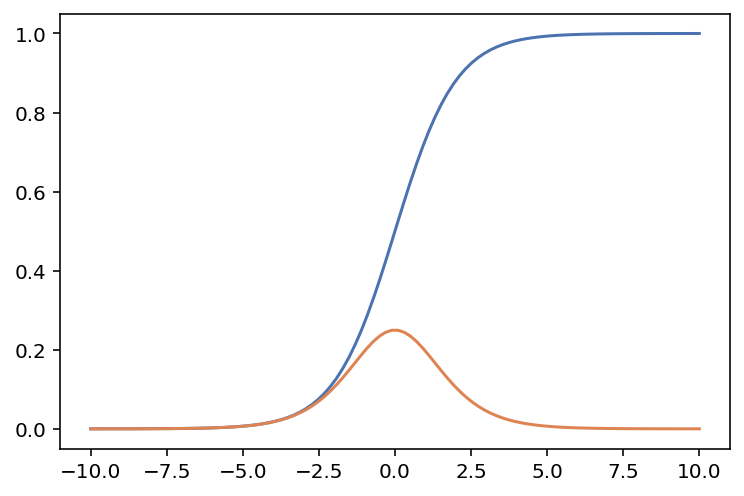

In [20]:
plt.plot(x.data.numpy(), b.data.numpy(), label = r'$sigmoid$')
plt.plot(x.data.numpy(), x.grad.data.numpy(), label = r'$ \frac{\partial (sigmoid)}{\partial z}$')

In [22]:
np.unique(np.round((x.grad.data.numpy() - dsigmoid(sigmoid(z))),4))

array([0.])

### Hyperbolic tangent activation function

In [ ]:
def tanh(z):
    return np.tanh(z)

# derivative of tanh
def dtanh(a):
    return 1-np.power(a,2)

In [ ]:
plt.plot(z, tanh(z),'b', label = 'tanh')
plt.plot(z, dtanh(tanh(z)),'r', label=r'$ \frac{dtanh}{dz}$')
plt.legend(fontsize = 12)
plt.show()

### ReLU (Rectified Linear Unit) Activation function

In [ ]:
def ReLU(z):
    return np.maximum(0,z)

# derivative of ReLu
def dReLU(a):
    return 1*(a>0)

In [ ]:
plt.plot(z, ReLU(z),'b', label ='ReLU')
plt.plot(z, dReLU(ReLU(z)),'r', label=r'$ \frac{dReLU}{dz}$')
plt.legend(fontsize = 12)
plt.xlabel('z')
plt.ylim(0,4)
plt.xlim(-4,4)
plt.show()

### Leaky ReLU Activation function

In [ ]:
def LeakyReLU(z):
    return np.maximum(0.01*z,z)

# derivative of ReLu
def dLeakyReLU(a):
    return 0.01*(a>0)

In [ ]:
plt.plot(z, LeakyReLU(z),'b', label = 'LeakyReLU')
plt.plot(z, dLeakyReLU(LeakyReLU(z)),'r', label=r'$ \frac{dLeakyReLU}{dz}$')
plt.legend(fontsize = 12)
plt.xlabel('z')
plt.ylim(0,4)
plt.xlim(-4,4)
plt.show()

### Comparison of derivative for activation functions

In [ ]:
plt.plot(z, dsigmoid(sigmoid(z)),label = r'$ \frac{dsigmoid}{dz}$' )
plt.plot(z, dtanh(tanh(z)), label = r'$ \frac{dtanh}{dz}$')
plt.plot(z, dReLU(ReLU(z)), label=r'$ \frac{dReLU}{dz}$')
plt.plot(z, dLeakyReLU(LeakyReLU(z)), label=r'$ \frac{dLeakyReLU}{dz}$')
plt.legend(fontsize = 12)
plt.xlabel('z')
plt.title('Derivatives of activation functions')
plt.show()